In [1]:
import os 
import cv2
import imutils
import numpy as np
import json  as json
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

cur_dir:str = os.getcwd().split(os.path.sep)[::-1][0]
if cur_dir != 'extract-foreground-video':
    os.chdir('..')

# Guide
In this notebook we put some example of results so that you can use this material as a guide

In [2]:
from src.algorithm 			 import algorithm
from src.algorithm_base 	 import algorithm_base
from src.algorithm_auto 	 import algorithm_auto
from src.algorithm_auto 	 import algorithm_auto_with_mask
from src.utils 				 import *
from src.subtract_background import subtract_background

## Subtract Background

Here we use a subtrack background strategy

In [3]:
FRAME_1 = 'res/screenshots/beach.jpg'
BG_1    = 'res/screenshots/beach_bg.png'

frame = cv2.imread(FRAME_1)
png   = cv2.imread(BG_1)


full, mask, fg, bg = subtract_background(frame, png)

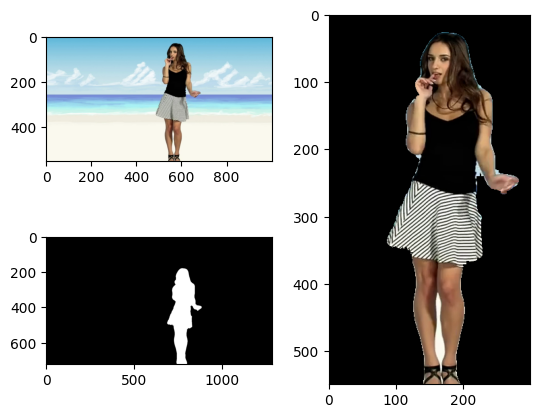

In [4]:
def crop(image, x1, x2, y1, y2):
    return image[y1:y2, x1:x2]

_res = crop(fg, 600, 900, 150, 700)
_in  = crop(frame, 200, 1200, 150, 700)


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#ax1.imshow(frame)
ax1.imshow(_in[:,:,::-1])
ax2.imshow(_res[:,:,::-1])
ax3.imshow(mask[:,:], cmap='gray')

plt.show()


## Chroma Key + Contour Detection
Here we use an algorithm that combines the chroma key with contour detection in the mask. This results have been considered our baseline for a lot. 

In [5]:
FRAME_2 = 'res/screenshots/theater.jpg'

frame = cv2.imread(FRAME_2)

# parameters
cfg = {"l_h": 115, "u_h": 250, "l_s": 0, "u_s": 255, "l_v": 0, "u_v": 255, "algo": 0, "inv": 0, "width": 800, "height": 572}
args = cfg.copy()
del args['inv']
del args['algo']
del args['width']
del args['height']

full, mask, fg, bg = algorithm(frame, **args)

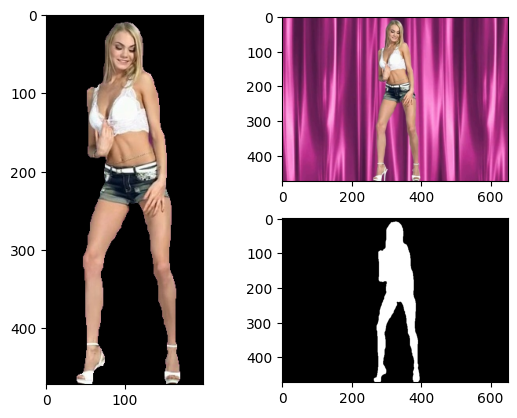

In [6]:
_res = crop(fg,    300, 500, 100, 600)
_in  = crop(frame, 75, 725, 100, 600)
_msk = crop(mask,  75, 725, 100, 600)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
ax3 = fig.add_subplot(2, 2, 4)

ax1.imshow(_in[:,:,::-1])
ax2.imshow(_res[:,:,::-1])
ax3.imshow(_msk[:,:], cmap='gray')


## Difference between the Subtrack Background vs Chroma Key + Contour Detection
Sometimes the `algorithm.py` seems really easy and may work pretty well. Sometimes using a static background image may really help to obtain better results.

Let's take a look here


In [7]:
from src.utils import * 

FRAME_4 = 'res/screenshots/plane.jpg'
BG_4    = 'res/screenshots/plane_bg.jpg'

frame = cv2.imread(FRAME_4)
png   = cv2.imread(BG_4)

_, mask_bg, res_bg, _ = subtract_background(frame, png)

cfg = {"l_h": 29, "u_h": 120, "l_s": 75, "u_s": 255, "l_v": 0, "u_v": 255}
_, ch, res_ch, _ = algorithm(frame, **cfg)


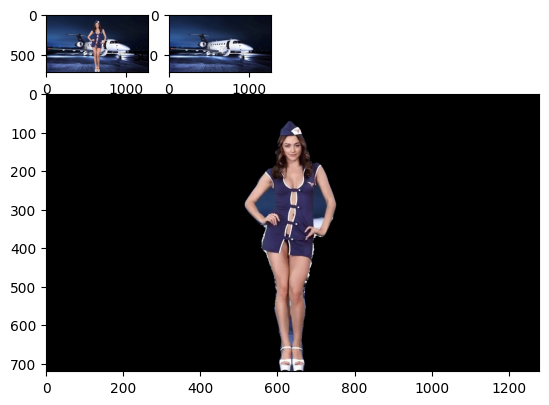

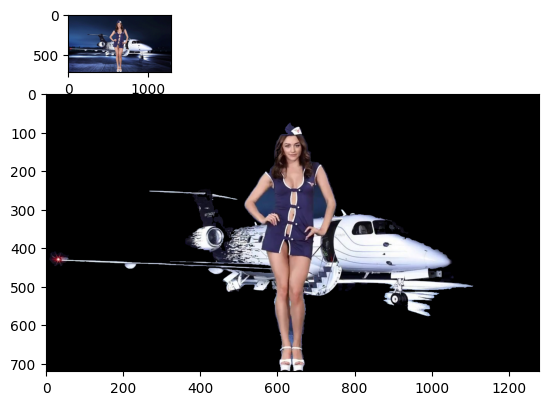

In [8]:
_out1 = res_bg 
_out2 = res_ch 
_in1  = frame 
_in2  = png


fig = plt.figure(figsize=(14, 9))

ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2)
ax3 = fig.add_subplot(2, 9, 1)
# ax4 = fig.add_subplot(2, 9, 6)
ax5 = fig.add_subplot(2, 9, 2)

ax1.imshow(_out1[:,:,::-1])
# ax2.imshow(_out2[:,:,::-1])
ax3.imshow(_in1[:,:,::-1])
# ax4.imshow(_in1[:,:,::-1])
ax5.imshow(_in2[:,:,::-1])


# fig 2
fig2 = plt.figure(figsize=(14, 9))
ax2 = fig2.add_subplot(1, 2, 2)
ax4 = fig2.add_subplot(2, 9, 6)

ax2.imshow(_out2[:,:,::-1])
ax4.imshow(_in1[:,:,::-1])


## Grub cut
Finally we have an algorithm variation of the OpenCv grub_cut. Take care that this algorithm is very powerful, can solve a lot of problems but it is very heavy, specially with video with high resolutions (>= 720p) 

In [9]:
from src.utils import * 

FRAME_5 = 'res/screenshots/blue.jpg'

frame = cv2.imread(FRAME_5)

cfg = {"l_h": 118, "u_h": 179, "l_s": 0, "u_s": 255, "l_v": 0, "u_v": 255}

full, mask, fg, bg = algorithm(frame, **cfg)
full, mask, _, bg = algorithm_auto_with_mask(frame, mask)
print("Resolution: {}x{}".format(frame.shape[1], frame.shape[0]))

[INFO] applying GrabCut took 1.20 seconds
Resolution: 780x580


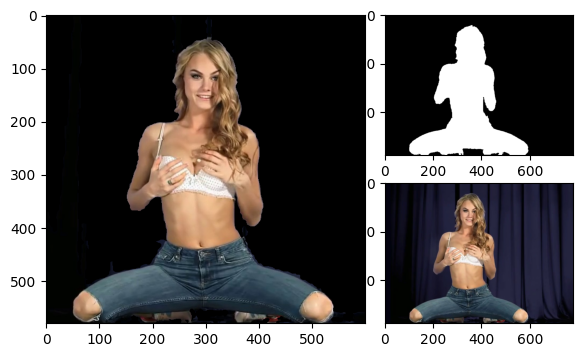

In [10]:
_res = crop(fg, 50, 650, 0, 580)
_in  = frame


fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 3, 6)
ax3 = fig.add_subplot(2, 3, 3)

#ax1.imshow(frame)
ax1.imshow(_res[:,:,::-1])
ax2.imshow(_in[:,:,::-1])
ax3.imshow(mask[:,:], cmap='gray')